## 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 당뇨병 데이터 탐색

In [2]:
from sklearn.datasets import load_diabetes
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
df.describe()   # 분포가 N (0, 0.476)으로 이미 정규화 되어 있음

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [6]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- 10개의 feature와 target 간의 상관 관계도

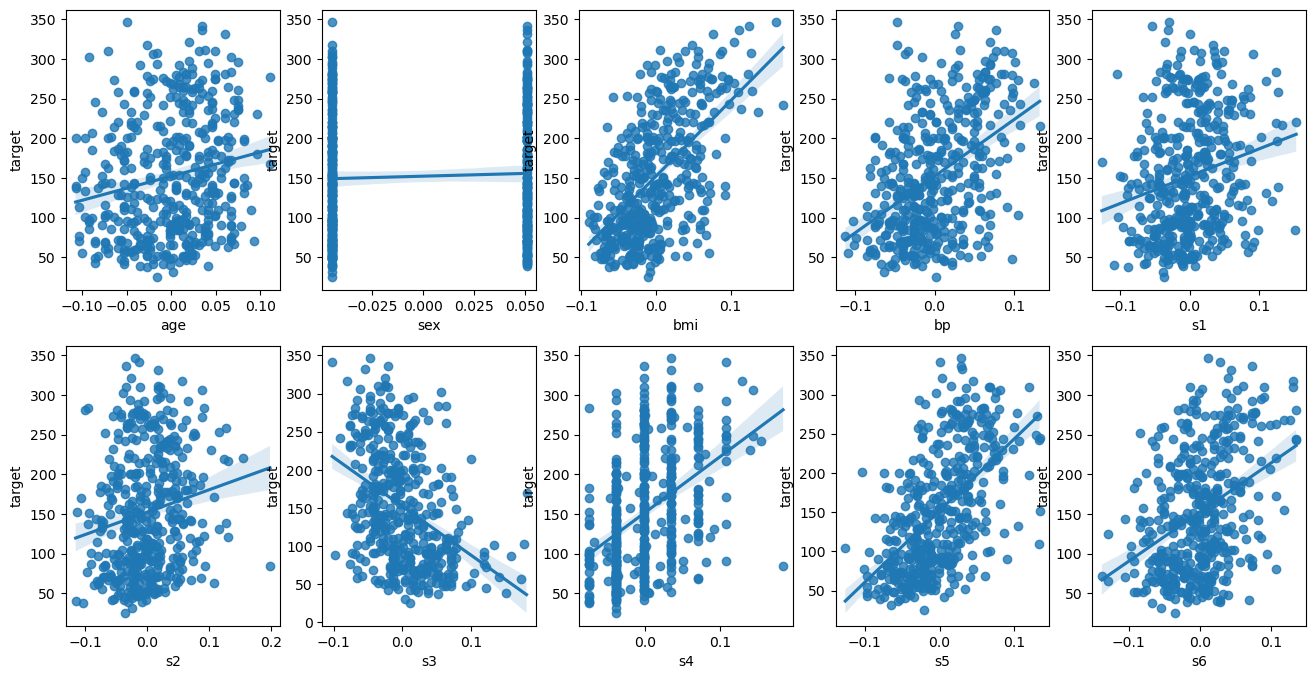

In [14]:


fig, axs = plt.subplots(2, 5, figsize=(16,8))   
for i, feature in enumerate(diab.feature_names):
    row, col = i // 5, i % 5           # 항상 동일
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

# bmi, s5 그래프가 괜찮은듯!

- 10 개의 feature의 Rsquared 값

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [20]:
for feature in diab.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, diab.target)
    score = lr.score(X, diab.target)
    print(f'{feature}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


### BMI vs target

- 훈련/테스트 데이터넷 분리

In [34]:
# 값이 단일화 되어 있어서 stratify 를 할 수 없다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1, 1), diab.target, test_size=0.2, random_state=2023
)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
# 가중치, 바이어스 
lr.coef_,lr.intercept_

(array([934.31985305]), 152.34582045693807)

In [37]:
# R squred
lr.score(X_test, y_test)

0.3017494407564788

In [38]:
# 회귀선
xs = np.array([X_train.min(), X_train.max()])
ys = lr.coef_[0] * xs + lr.intercept_


- 시각화

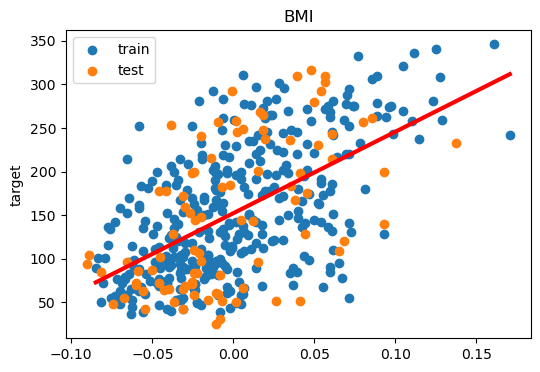

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(xs, ys, c='red',lw=3)
plt.title('BMI'), plt.ylabel('target'), plt.legend()
plt.show()


## s3(HDL) vs target

In [41]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.s3.values.reshape(-1, 1), diab.target,test_size=0.2, random_state=2023
)
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)
lr2.score(X_test2,y_test2)

0.16858816542532107

In [43]:
xs2 = np.array([X_train2.min(), X_train2.max()])
ys2 = lr2.coef_[0] * xs2 + lr.intercept_

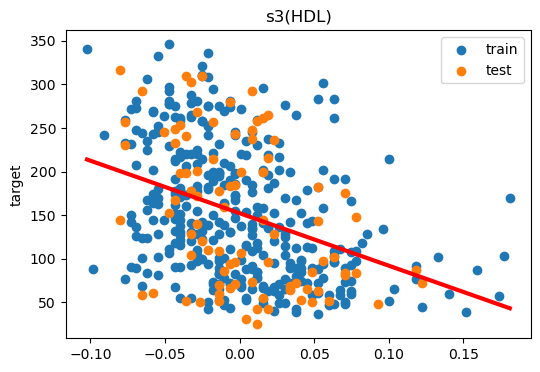

In [44]:
plt.figure(figsize=(6,4))
plt.scatter(X_train2,y_train2,label='train')
plt.scatter(X_test2,y_test2,label='test')
plt.plot(xs2, ys2, c='red',lw=3)
plt.title('s3(HDL) vs target', fontsize=15)
plt.title('s3(HDL)'), plt.ylabel('target'), plt.legend()
plt.show()